## 1 简介
探索性数据分析（EDA）是一种分析 数据集的方法，通常采用可视方法来总结其主要特征。一个统计模型，可以使用或不使用，但主要EDA是看到的数据可以告诉我们超越了正式的模型或假设检验任务。

EDA与初始数据分析（IDA）不同，它更侧重于检查模型拟合和假设检验所需的假设，处理缺失值并根据需要进行变量转换。EDA包含IDA。

## 2 技术

EDA中使用的典型图形技术是：

- 箱形图
- 直方图
- 多变量图表
- 运行图表
- 帕累托图
- 散点图
- 茎叶图
- 平行坐标
- 优势比
- 有针对性的投射追求
- 基于字形的可视化方法
- 降维：
  - 多维缩放
  - 主成分分析（PCA）
  - 多线性PCA
  - 非线性降维（NLDR）
- 投影方法，如盛大游览，导游和手动游览
- 这些图的交互式版本
典型的定量技术是：

- 中值抛光
- Trimean
- 排序

## 3 Kaggle
我们在参加比赛的时候经常看到一些大佬公开的eda notebook，在构建模型之前，我们可以通过EDA挖掘数据的特征，这样有利于我们更好地的理解数据

## 4 红酒白酒质量数据集

In [13]:
import pandas as pd
import seaborn as sns

In [6]:
## 白酒质量数据集
df=pd.read_csv('data/winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
## 行数和列数
df.shape


(4898, 12)

最后一列`quality`为因变量，其余11列为自变量

In [8]:
## 数据字段的类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


我们从上面数据信息可以看出：
- 数据的类型只有浮点型和整数型
- 所有的列没有缺失值

In [10]:
## df.describe()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


df.describe()非常方便，可以统计数值型数据的 count, mean, standard deviation, minimum and maximum 

In [11]:
## quality分析
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

- 目标变量quality为离散型、类别变量
- quality的范围为1-10，1代表酒的质量最差，10代表酒的质量最好
- 1,2,10评级没有出现在数据里，只有3-9

In [12]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

质量6/5/7的数量最多，3和9的数量很少

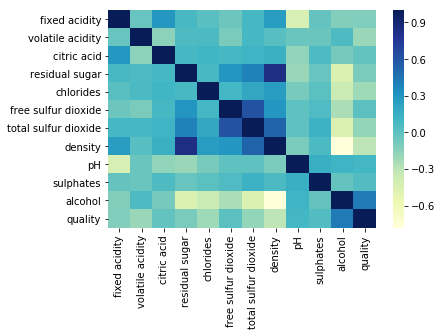

In [45]:
## heatmap
sns.heatmap(df.corr(),cmap="YlGnBu",)

我们构建线性回归模型的时候，很有必要去除一些相关变量，来提升模型；

颜色深的区域表示对应两个变量相关性大，颜色越浅代表相关性越小

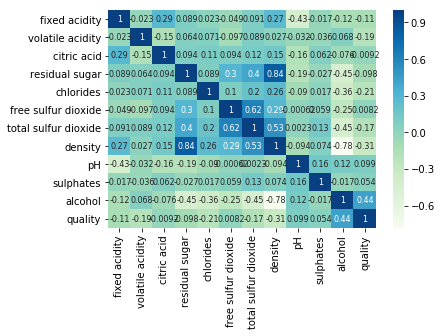

In [49]:
## heatmap
## https://github.com/aschn/gnuplot-colorbrewer/tree/master/sequential 颜色
sns.heatmap(df.corr(),annot=True,cmap="GnBu",annot_kws={"fontsize":"large","size":8},)

从上图我们可以推断出：
- `density`和`residual sugar`有很强的正相关关系，然而和`alcohol`有很强的负相关关系
- `free sulphur dioxide`、`citric acid`和`quality`几乎没有关系
- 既然有些变量与因变量之间的相关性接近为0，所以在使用线性回归模型的时候舍去这些特征

箱形图（Box-plot）又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图。因形状如箱子而得名。在各种领域也经常被使用，常见于品质管理。它主要用于反映原始数据分布的特征，还可以进行多组数据分布特征的比 较。箱线图的绘制方法是：先找出一组数据的最大值、最小值、中位数和两个四分位数；然后， 连接两个四分位数画出箱子；再将最大值和最小值与箱子相连接，中位数在箱子中间。
![](https://gss1.bdstatic.com/-vo3dSag_xI4khGkpoWK1HF6hhy/baike/c0%3Dbaike80%2C5%2C5%2C80%2C26/sign=28928945f1deb48fef64a98c9176514c/0b55b319ebc4b74596c1a432cdfc1e178a8215b8.jpg)

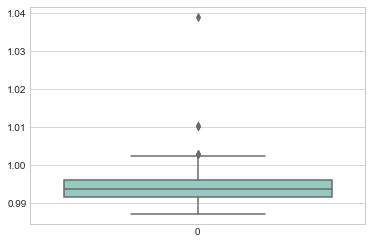

In [59]:
sns.set_style("whitegrid")
ax = sns.boxplot(data=df.density, palette="Set3")

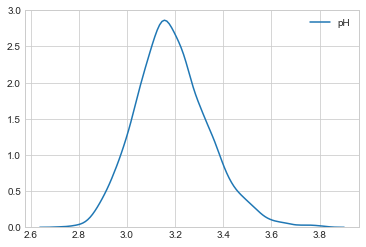

In [61]:
sns.kdeplot(df.pH)